In [43]:
import numpy as np
import a2_utils as a2u
import matplotlib.pyplot as plt
import cv2
import math
import os

# Excercise 1, task b
Question: Can you recognize the shape of the kernel? What is the sum of the elements in the kernel? How does the kernel affect the signal?
This is a gaussian kernel. The sum is approximately 1. The kernel smoothenes the signal through gaussian filtering.


In [44]:
def correlation_on_slice(signal_1: np.array, signal_2: np.array):
    correlation = np.sum(signal_1 * signal_2)
    return correlation

test_signal_1 = np.array([2, 3, 4])
test_signal_2 = np.array([7, 5, 2])
test_correlation = correlation_on_slice(test_signal_1, test_signal_2)
print("correlation_on_slice test. Should be 37: " + str(test_correlation))


correlation_on_slice test. Should be 37: 37


simple_convolution test. Should be: [4, 7, 10, 13, 16, 19, 22, 25]
[ 4.  7. 10. 13. 16. 19. 22. 25.]


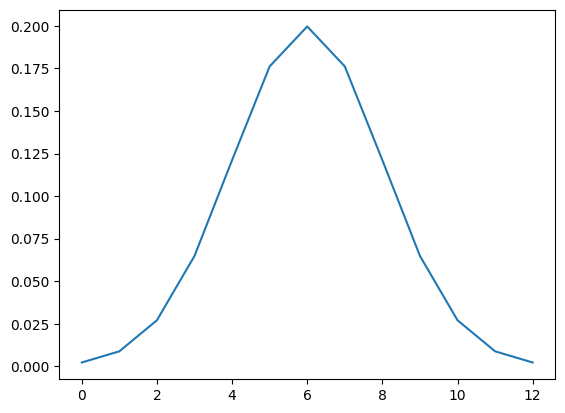

0.9999999974


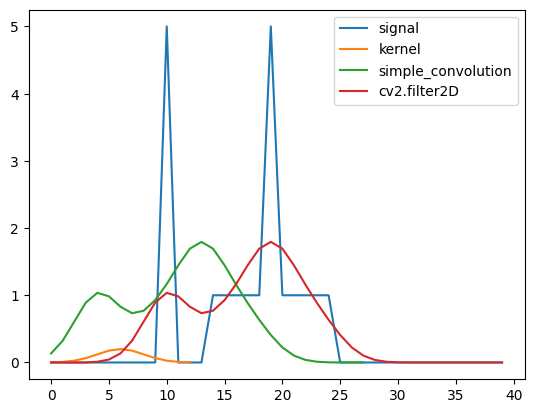

In [45]:
def simple_convolution(signal_1D: np.array, kernel: np.array):
    N = (kernel.size - 1) / 2
    reversed_kernel = np.flip(kernel)

    resulting_signal_length = int(signal_1D.size - 2*N)

    resulting_signal = np.zeros(resulting_signal_length)
    for i in range(resulting_signal_length):
        resulting_signal[i] = correlation_on_slice(signal_1D[i:(i+kernel.size)], reversed_kernel)
    
    return resulting_signal

test_signal = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
kernel = np.array([2, 0, 1])
test_resulting_signal = simple_convolution(test_signal, kernel)
print("simple_convolution test. Should be: [4, 7, 10, 13, 16, 19, 22, 25]")
print(test_resulting_signal)


signal = a2u.read_data("signal.txt")
kernel = a2u.read_data("kernel.txt")
plt.plot(kernel)
plt.show()
print(np.sum(kernel))
convolved_signal = simple_convolution(signal, kernel)
cv2_convolution = cv2.filter2D(src=signal, ddepth=-1, kernel=kernel)


plt.plot(signal, label="signal")
plt.plot(kernel, label="kernel")
plt.plot(convolved_signal, label="simple_convolution")
plt.plot(cv2_convolution, label="cv2.filter2D")
plt.legend()
plt.show()



    

# Excercise 1, task c

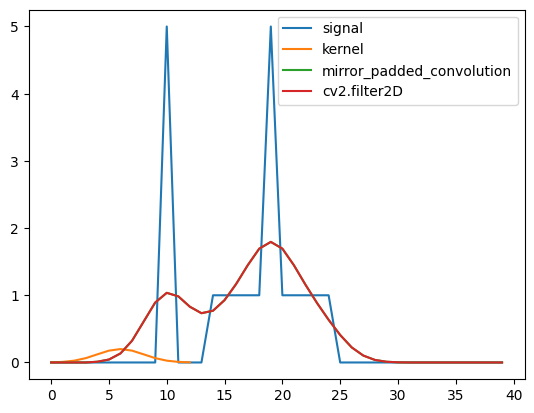

In [46]:
def mirror_padded_convolution(signal_1D: np.array, kernel: np.array):
    N = int((kernel.size - 1) / 2)
    
    signal_1D_padded = signal_1D.copy()
    mirror_signal_1D = np.flip(signal_1D)
    signal_1D_padded = np.insert(signal_1D_padded, 0, mirror_signal_1D[-N:])
    signal_1D_padded = np.append(signal_1D_padded, mirror_signal_1D[0:N])
    test_dimensions_check = signal_1D_padded.size == (signal_1D.size + 2*N)
    # print("mirror_padded_convolution dimensions check. Should be True:" + str(test_dimensions_check))
    
    reversed_kernel = np.flip(kernel)

    resulting_signal = np.zeros(signal_1D.size)
    for i in range(resulting_signal.size):
        resulting_signal[i] = correlation_on_slice(signal_1D_padded[i:(i+kernel.size)], reversed_kernel)
    
    return resulting_signal


signal = a2u.read_data("signal.txt")
kernel = a2u.read_data("kernel.txt")
convolved_signal = mirror_padded_convolution(signal, kernel)
cv2_convolution = cv2.filter2D(src=signal, ddepth=-1, kernel=kernel)


plt.plot(signal, label="signal")
plt.plot(kernel, label="kernel")
plt.plot(convolved_signal, label="mirror_padded_convolution")
plt.plot(cv2_convolution, label="cv2.filter2D")
plt.legend()
plt.show()

# Excercise 1, task d
Question: The figure below shows two kernels (a) and (b) as well as signal (c). Sketch (do not focus on exact proportions of your drawing, but rather on the understanding
of what you are doing) the resulting convolved signal of the given input signal and each kernel.

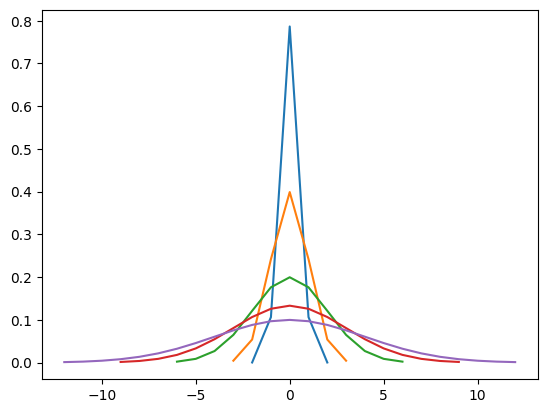

In [47]:

def gauss(sigma: float):
    side_width = int(math.ceil(3*sigma))
    kernel_size = int(2 * side_width +1)
    kernel_x_values = np.array(range(-side_width, side_width+1))
    coef = 1 / (sigma * math.sqrt(2*math.pi))
    kernel =  coef * np.exp( -(kernel_x_values ** 2) / (2* (sigma**2)) )
    kernel /= np.sum(kernel)
    return kernel, kernel_x_values

sigmas = [0.5, 1, 2, 3, 4]
for i in sigmas:
    kernel, kernel_x_values = gauss(i)
    plt.plot(kernel_x_values, kernel)
plt.show()


# Excercise 1, task (e)

k_2 is probably given wrong. It should sum to 1.

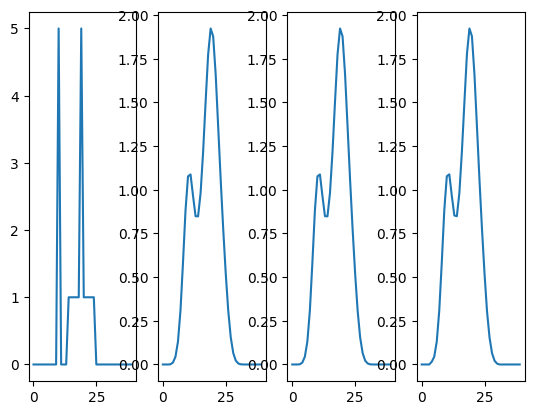

In [48]:


k_1, _ = gauss(2)
k_2 = np.array([0.1, 0.6, 0.4])
signal = a2u.read_data("signal.txt")

plt.subplot(1, 4, 1)
plt.plot(signal)

plt.subplot(1, 4, 2)
preconvolved = mirror_padded_convolution(signal, k_1)
convolved_signal = mirror_padded_convolution(preconvolved, k_2)
plt.plot(convolved_signal)

plt.subplot(1, 4, 3)
preconvolved = mirror_padded_convolution(signal, k_2)
convolved_signal = mirror_padded_convolution(preconvolved, k_1)
plt.plot(convolved_signal)

plt.subplot(1, 4, 4)
k_3 = mirror_padded_convolution(k_1, k_2)
convolved_signal = mirror_padded_convolution(signal, k_3)
plt.plot(convolved_signal)

plt.show()


# Excercise 2, task (a)
Question: Which noise is better removed using the Gaussian filter? \
Gaussian noise is better removed. Salt and pepper isn't really reoved, the blur just makes it less prominent.

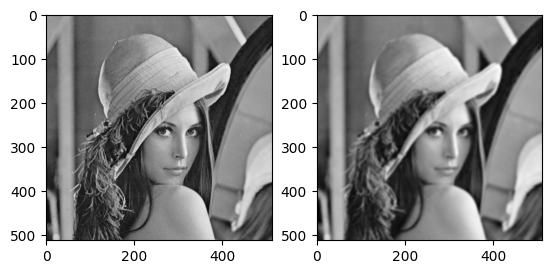

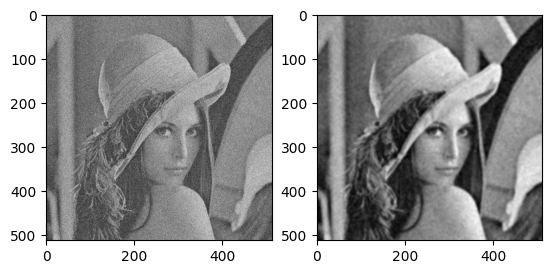

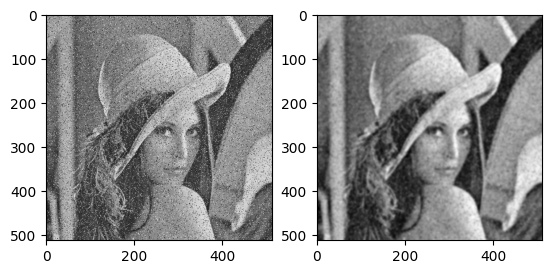

In [49]:
def gaussfilter(img, sigma):
    kernel_1D, _ = gauss(sigma)
    kernel_1D = kernel_1D.reshape((1, kernel_1D.size))
    # print(kernel_1D.shape)
    # print(kernel_1D.T)

    kernel_2D = kernel_1D.T * kernel_1D
    kernel_2D = kernel_2D / np.sum(kernel_2D)
    # print(kernel_2D)
    convolved_img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_2D)
    return convolved_img


sigma = 2

lena_img = plt.imread(".\\images\\lena.png")
lena_img = lena_img.astype(np.float64)
lena_gray = np.sum(lena_img, axis=2) / 3
plt.subplot(1, 2, 1)
plt.imshow(lena_gray, cmap='gray')

lena_gaussian_filter = gaussfilter(lena_gray, sigma)
plt.subplot(1, 2, 2)
plt.imshow(lena_gaussian_filter, cmap='gray')
plt.show()

lena_gaussian_noise = a2u.gauss_noise(lena_gray)
plt.subplot(1, 2, 1)
plt.imshow(lena_gaussian_noise, cmap='gray')


lena_G_N_filtered = gaussfilter(lena_gaussian_noise, sigma)
plt.subplot(1, 2, 2)
plt.imshow(lena_G_N_filtered, cmap='gray')
plt.show()

lena_SAP_noise = a2u.sp_noise(lena_gray)
plt.subplot(1, 2, 1)
plt.imshow(lena_SAP_noise, cmap='gray')

lena_SAP_N_filtered = gaussfilter(lena_SAP_noise, sigma)
plt.subplot(1, 2, 2)
plt.imshow(lena_SAP_N_filtered, cmap='gray')
plt.show()

# Excercise 2, task b

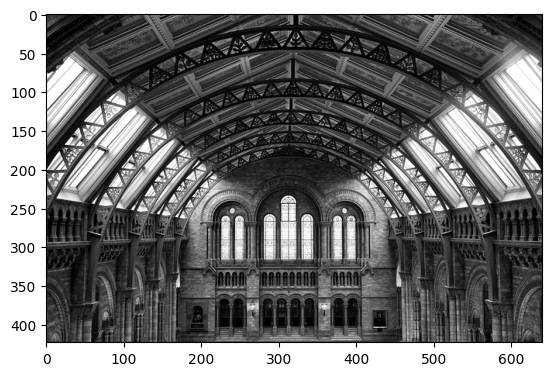

[[-0.11111111 -0.11111111 -0.11111111]
 [-0.11111111  1.88888889 -0.11111111]
 [-0.11111111 -0.11111111 -0.11111111]]


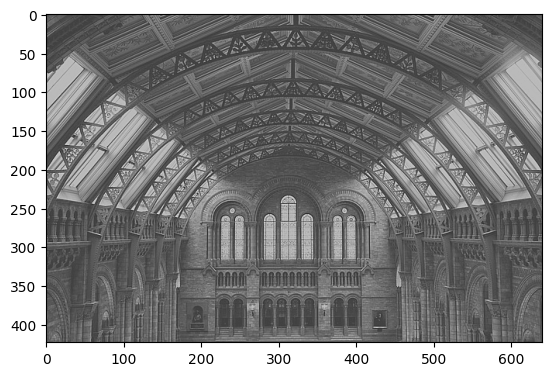

83.3172379826635
83.30964998686628


In [50]:
def sharpen(img, kernel_width_and_heigth, difference_constant):
    sharpening_kernel = difference_constant * (-1/(kernel_width_and_heigth**2)) * np.ones((kernel_width_and_heigth,kernel_width_and_heigth))
    centre_element_ix = int((kernel_width_and_heigth-1)/2)
    sharpening_kernel[centre_element_ix, centre_element_ix] += 1 + difference_constant
    print(sharpening_kernel)

    convolved_img = cv2.filter2D(src=img, ddepth=-1, kernel=sharpening_kernel)
    return convolved_img

museum_img = plt.imread(".\\images\\museum.jpg")
museum_img = museum_img.astype(np.float64)
museum_gray = np.sum(museum_img, axis=2) / 3
plt.imshow(museum_gray, cmap='gray')
plt.show()

museum_sharpened = sharpen(museum_gray, 3, 1)
plt.imshow(museum_sharpened, cmap='gray')
plt.show()

print(np.mean(museum_gray))
print(np.mean(museum_sharpened))

    

# Excercise 2, task c
Question: Which filter performs better at this specific task? In comparison to Gaussian filter that can be applied multiple times in any order, does the order matter in case of median filter? What is the name of filters like this? \
The median filter performs better at this task.\
The order of operations does matter for the median filter. \
Such filters are called non-linear. \

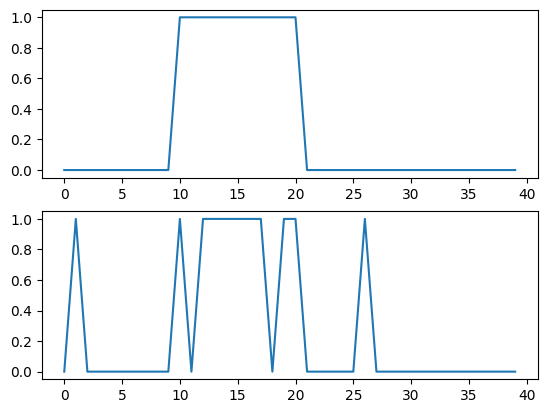

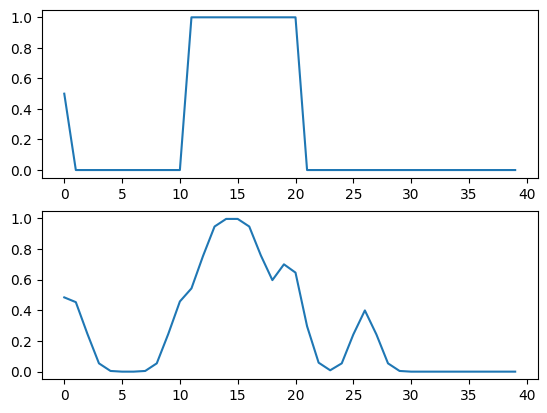

In [51]:
def sp_noise_1D(signal, percent=.2):
	res = signal.copy()
	res[np.random.rand(signal.size) < percent / 2] = 1
	res[np.random.rand(signal.size) < percent / 2] = 0
	return res

def simple_median(signal: np.array, width):
    N = int((width-1)/2)
    return_array = np.zeros(signal.size)

    for i in range(return_array.size):
        
        left_ix = i - N
        right_ix = i + N

        if left_ix < 0:
            left_ix = 0
        if right_ix >= return_array.size:
            right_ix = return_array.size - 1
        
        return_array[i] = np.median(signal[left_ix : right_ix+1])
    
    return return_array



simple_signal = np.zeros(40)
simple_signal[10:21] = 1
plt.subplot(2, 1, 1)
plt.plot(simple_signal)

simple_signal_SAP_corrupted = sp_noise_1D(simple_signal)
plt.subplot(2, 1, 2)
plt.plot(simple_signal_SAP_corrupted)
plt.show()

simple_signal_SAP_simple_median = simple_median(simple_signal_SAP_corrupted, 3)
plt.subplot(2, 1, 1)
plt.plot(simple_signal_SAP_simple_median)

simple_signal_SAP_gauss_filter = gaussfilter(simple_signal_SAP_corrupted, 1)
plt.subplot(2, 1, 2)
plt.plot(simple_signal_SAP_gauss_filter)
plt.show()


# Excercise 2, task d
Question: What is the computational complexity of the Gaussian filter operation? How about the median filter? What does it depend on? Describe the computational complexity using the O(.) notation (you can assume n*log(n) complexity for sorting).

With an n1 x n1 kernel and an m x n image:
Gaussian filter performs n1 x n1 operations m x n times. So it has O(m * n * n1^2)
Median filter performs a sort on n1 * n1 operands m x n times. This makes it O(m * n * n1^2 * log(n1^2)) = O(m * n * n1^2 * 2 * log(n1^2)) = O(m * n * n1^2 * log(n1))

In [52]:
def median_2D_filter(img, width):
    N = int((width-1)/2)
    return_array = np.zeros(img.shape)

    for i in range(return_array.shape[0]):
        for j in range(return_array.shape[1]):
            
            upper_ix = i - N
            lower_ix = i + N

            if upper_ix < 0:
                upper_ix = 0
            if lower_ix >= return_array.shape[0]:
                lower_ix = return_array.shape[0] - 1

            left_ix = j - N
            right_ix = j + N

            if left_ix < 0:
                left_ix = 0
            if right_ix >= return_array.shape[1]:
                right_ix = return_array.shape[1] - 1
            
            return_array[i,j] = np.median(img[upper_ix : lower_ix + 1, left_ix : right_ix+1])
    
    return return_array




def gaussian_2D_kernel(sigma):
    kernel_1D, _ = gauss(sigma)
    kernel_1D = np.reshape(kernel_1D, (1, kernel_1D.size))
    kernel_2D = kernel_1D.T * kernel_1D
    kernel_2D = kernel_2D / np.sum(kernel_2D)

    # print(kernel_1D)
    # print(kernel_2D)
    # print("\n\n\n")
    return kernel_2D

def gaussian_2D_filter(img, width, sigma=-1):
    
    kernel_2D = gaussian_2D_kernel(sigma)

    convolved_img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_2D)
    return convolved_img






def gauss_with_width(width, sigma=-1):
        
    if sigma == -1:
        # side_width = int(math.ceil(3*sigma))
        sigma = width / 3
    
    side_width = int((width - 1) / 2)
    kernel_x_values = np.array(range(-side_width, side_width+1))
    coef = 1 / (sigma * math.sqrt(2*math.pi))
    kernel =  coef * np.exp( -(kernel_x_values ** 2) / (2* (sigma**2)) )
    
    kernel /= np.sum(kernel)
    return kernel, kernel_x_values

def gaussian_with_width_2D_kernel(width, sigma=-1):
    kernel_1D, _ = gauss_with_width(width, sigma)
    kernel_1D = np.reshape(kernel_1D, (1, kernel_1D.size))
    kernel_2D = kernel_1D.T * kernel_1D
    kernel_2D = kernel_2D / np.sum(kernel_2D)

    # print(kernel_1D)
    # print(kernel_2D)
    # print("\n\n\n")
    return kernel_2D

def gaussian_with_width_2D_filter(img, width, sigma=-1):
    
    kernel_2D = gaussian_with_width_2D_kernel(width, sigma)

    convolved_img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_2D)
    return convolved_img

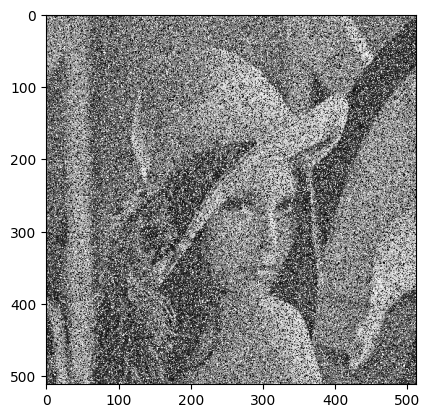

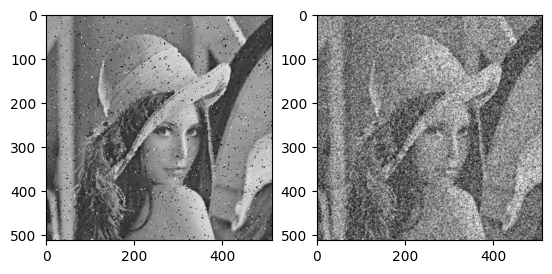

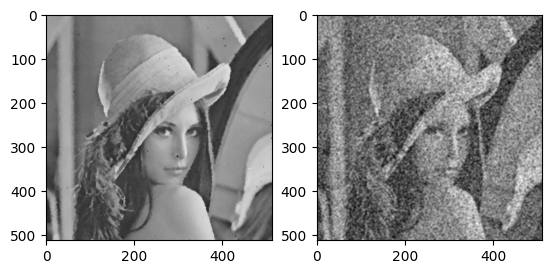

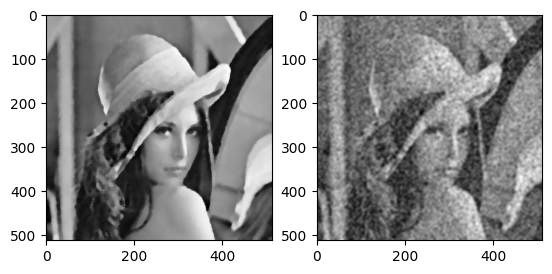

In [53]:


lena_img = plt.imread(".\\images\\lena.png")
lena_img = lena_img.astype(np.float64)
lena_gray = np.sum(lena_img, axis=2) / 3

corrupt_prob = 0.4
lena_SAP_noise = a2u.sp_noise(lena_gray, corrupt_prob)
plt.imshow(lena_SAP_noise, cmap='gray')
plt.show()

for width in range(3, 10, 3):

    lena_SAP_N_median_filtered = median_2D_filter(lena_SAP_noise, width)
    plt.subplot(1, 2, 1)
    plt.imshow(lena_SAP_N_median_filtered, cmap='gray')
    
    lena_SAP_N_gauss_filtered = gaussian_with_width_2D_filter(lena_SAP_noise, width)
    plt.subplot(1, 2, 2)
    plt.imshow(lena_SAP_N_gauss_filtered, cmap='gray')
    plt.show()




# Compare gaussian and median:

# for corrupt_prob in np.arange(0.0, 1, 0.3):
#     lena_SAP_noise = a2u.sp_noise(lena_gray, corrupt_prob)
#     plt.imshow(lena_SAP_noise, cmap='gray')
#     plt.show()

#     for width in range(3, 10, 3):

#         lena_SAP_N_median_filtered = median_2D_filter(lena_SAP_noise, width)
#         plt.subplot(1, 2, 1)
#         plt.imshow(lena_SAP_N_median_filtered, cmap='gray')
        
#         lena_SAP_N_gauss_filtered = gaussian_with_width_2D_filter(lena_SAP_noise, width)
#         plt.subplot(1, 2, 2)
#         plt.imshow(lena_SAP_N_gauss_filtered, cmap='gray')
#         plt.show()

# Excercise 2, task e

Basic gray images:


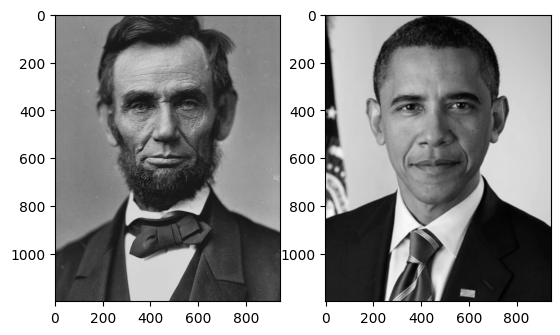

Filtered images and their mergings:


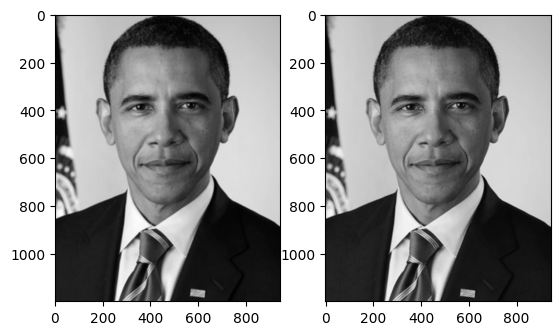

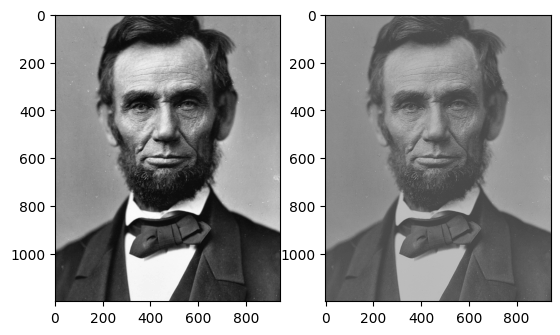

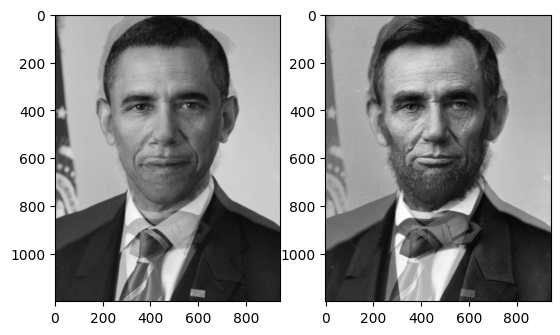

Filtered images and their mergings:


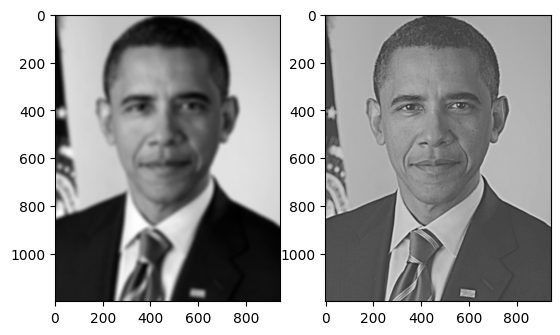

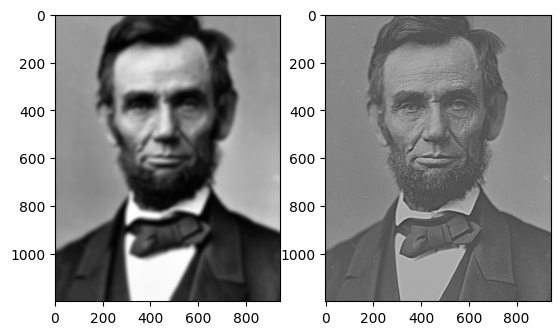

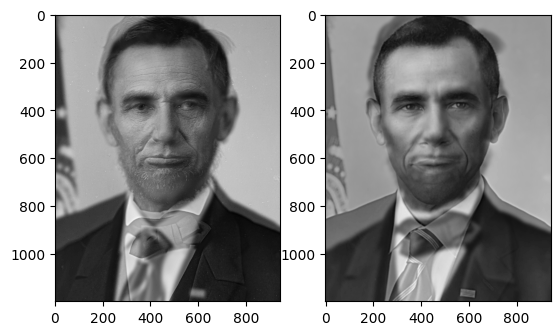

Filtered images and their mergings:


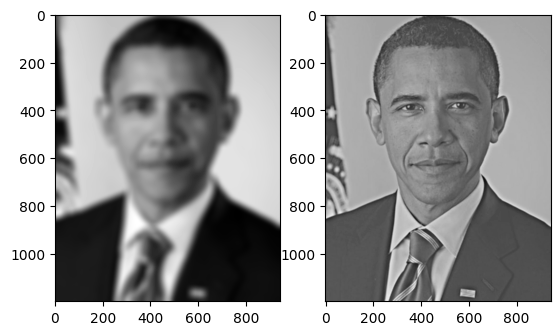

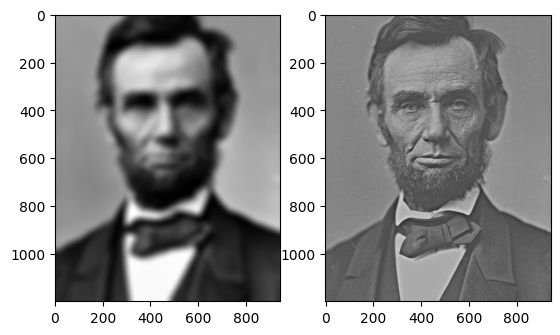

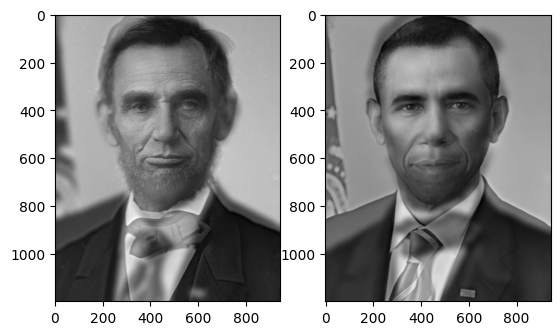

Filtered images and their mergings:


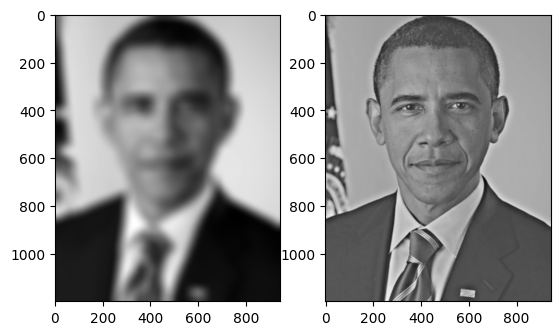

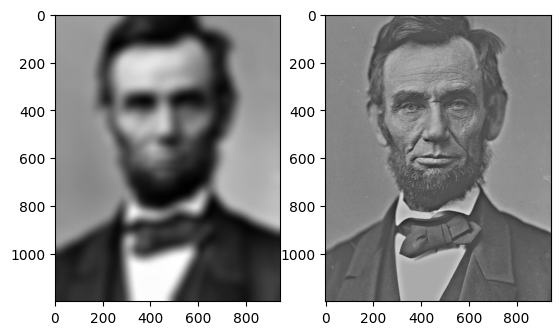

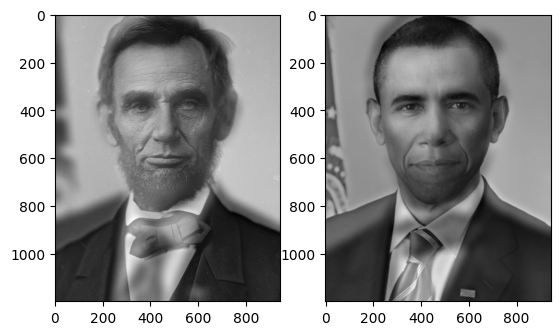

In [54]:

def laplacian_with_width_2D_filter(img, width, sigma):
    laplacian_kernel = np.zeros((width, width))
    middle_ix = int((width-1)/2)
    laplacian_kernel[middle_ix, middle_ix] = 2 # has to be two, so that when we subtract the gaussian it adds up to 1.

    gaussian_kernel = gaussian_with_width_2D_kernel(width, sigma)

    laplacian_kernel = laplacian_kernel - gaussian_kernel

    # print(laplacian_kernel, gaussian_kernel)

    convolved_img = cv2.filter2D(src=img, ddepth=-1, kernel=laplacian_kernel)
    return convolved_img

lincoln_img = plt.imread(".\\images\\lincoln.jpg")
lincoln_img = lincoln_img.astype(np.float64)
lincoln_gray = np.sum(lincoln_img, axis=2) / 3
plt.subplot(1, 2, 1)
plt.imshow(lincoln_gray, cmap='gray')

obama_img = plt.imread(".\\images\\obama.jpg")
obama_img = obama_img.astype(np.float64)
obama_gray = np.sum(obama_img, axis=2) / 3
plt.subplot(1, 2, 2)
plt.imshow(obama_gray, cmap='gray')
print("Basic gray images:")
plt.show()

for i in range(3, 70, 20):
    # print("Width" + str(i))
    sigma = -1
    obama_gauss = gaussian_with_width_2D_filter(obama_gray, i, sigma)
    obama_laplace = laplacian_with_width_2D_filter(obama_gray, i, sigma)
    lincoln_gauss = gaussian_with_width_2D_filter(lincoln_gray, i, sigma)
    lincoln_laplace = laplacian_with_width_2D_filter(lincoln_gray, i, sigma)
    
    print("Filtered images and their mergings:")
    plt.subplot(1, 2, 1)
    plt.imshow(obama_gauss, cmap="gray")
    plt.subplot(1, 2, 2)
    plt.imshow(obama_laplace, cmap="gray")
    plt.show()

    plt.subplot(1, 2, 1)
    plt.imshow(lincoln_gauss, cmap="gray")
    plt.subplot(1, 2, 2)
    plt.imshow(lincoln_laplace, cmap="gray")
    plt.show()

    for base_coef in np.arange(0.7, 1, 0.5):
        # print("Base coef:" + str(base_coef))

        obama_is_base = base_coef * obama_gauss + (1-base_coef) * lincoln_laplace
        lincoln_is_base = base_coef * lincoln_gauss + (1-base_coef) * obama_laplace

        plt.subplot(1, 2, 1)
        plt.imshow(obama_is_base, cmap="gray")
        plt.subplot(1, 2, 2)
        plt.imshow(lincoln_is_base, cmap="gray")
        plt.show()






# Excercise 3, task a

In [55]:
def myhist3(img, num_of_bins):
    histogram = np.zeros((num_of_bins, num_of_bins, num_of_bins))
    divider = 1 / num_of_bins

    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            R = int(math.floor(img[y][x][0] / divider))
            G = int(math.floor(img[y][x][1] / divider))
            B = int(math.floor(img[y][x][2] / divider))

            histogram[R][G][B] += 1
    
    histogram = histogram / histogram.sum()

    return histogram

def red_in_histogram(histogram):
    red_histogram = histogram.sum((1, 2))
    return red_histogram

def green_in_histogram(histogram):
    red_histogram = histogram.sum((0, 2))
    return red_histogram

def blue_in_histogram(histogram):
    red_histogram = histogram.sum((0, 1))
    return red_histogram

def print_colours_summed_from_3D_hist(hist):
        print("R: " + str(red_in_histogram(hist)))
        print("G: " + str(green_in_histogram(hist)))
        print("B: " + str(blue_in_histogram(hist)))



num_of_bins = 3

tomato_img = plt.imread(".\\dataset\\object_04_2.png")
# print(tomato_img.max())
tomato_hist = myhist3(tomato_img, num_of_bins)
# print(tomato_hist)

frog_img = plt.imread(".\\dataset\\object_28_4.png")
frog_hist = myhist3(frog_img, num_of_bins)
# print(frog_hist)

print_colours_summed_from_3D_hist(tomato_hist)
print_colours_summed_from_3D_hist(frog_hist)


R: [0.45391846 0.23736572 0.30871582]
G: [0.9675293 0.0324707 0.       ]
B: [0.98803711 0.01196289 0.        ]
R: [0.98278809 0.015625   0.00158691]
G: [0.72601318 0.26977539 0.00421143]
B: [0.94848633 0.04925537 0.0022583 ]


# Excercise 3, task b

In [56]:
def L2_distance(hist1, hist2):
    hist_diff = hist1 - hist2
    hist_dist = math.sqrt(np.sum(hist_diff ** 2))
    return hist_dist

def chi_square_distance(hist1, hist2):
    hist_dist_numerator = (hist1 - hist2) ** 2
    hist_dist_denominator = hist1 + hist2 + 1e-10 * np.ones(hist1.shape)

    hist_dist = 1/2 * np.sum(hist_dist_numerator / hist_dist_denominator)
    return hist_dist

def intersection_distance(hist1, hist2):
    min_hist = np.minimum(hist1, hist2)
    hist_dist = 1 - np.sum(min_hist)
    return hist_dist

def hellinger_distance(hist1, hist2):
    hist_root_diff = hist1 ** (1/2) - hist2 ** (1/2)
    hist_dist = (1/2 * np.sum(hist_root_diff ** 2)) ** (1/2)
    return hist_dist


# Excercise 3, task c
Question: Which image (object_02_1.png or object_03_1.png) is more similar to image object_01_1.png considering the L2 distance? How about the other three distances? We can see that all three histograms contain a strongly expressed component
(one bin has a much higher value than the others). Which color does this bin represent?

With all distances object_03_1.png is more similar to object_01_1.png than object_02_1.png.

This bin represents the collor black. This is the colour of the background, which has all three values at zero.
We used np.reshape(-1), which reshapes in a C-like ordering. It therefore starts with all three components being zero and first changes along the last component (blue in our case).

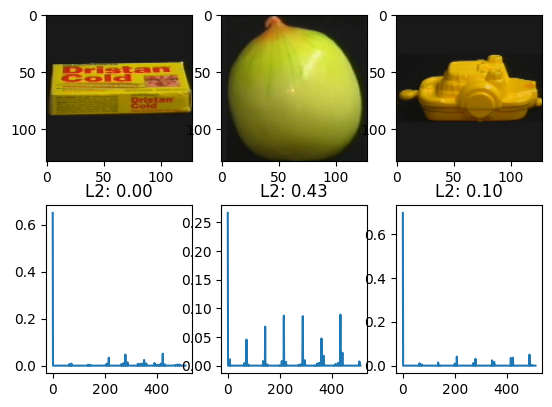

chi2: 0.00
chi2: 0.43
chi2: 0.13
Inters: 0.00
Inters: 0.60
Inters: 0.20
hell: 0.00
hell: 0.57
hell: 0.32


In [57]:
num_of_bins = 8

img1 = plt.imread(".\\dataset\\object_01_1.png")
img2 = plt.imread(".\\dataset\\object_02_1.png")
img3 = plt.imread(".\\dataset\\object_03_1.png")

hist1 = myhist3(img1, num_of_bins).reshape(-1)
hist2 = myhist3(img2, num_of_bins).reshape(-1)
hist3 = myhist3(img3, num_of_bins).reshape(-1)

images = [img1, img2, img3]
histograms = [hist1, hist2, hist3]
for i in range(1, 4):
    plt.subplot(2, 3, i)
    plt.imshow(images[i-1])
for i in range(1, 4):
    plt.subplot(2, 3, i+3)
    plt.title("L2: " + "{:.2f}".format(L2_distance(histograms[0], histograms[i-1])))
    plt.plot(histograms[i-1])
plt.show()


for i in range(3):
    print("chi2: " + "{:.2f}".format(chi_square_distance(histograms[0], histograms[i])))

for i in range(3):
    print("Inters: " + "{:.2f}".format(intersection_distance(histograms[0], histograms[i])))

for i in range(3):
    print("hell: " + "{:.2f}".format(hellinger_distance(histograms[0], histograms[i])))



# Excercise 3, task d

Hellinger distance performed best in terms of absolute distance between the sought out object and the next closest one (0.16 and 0.36; so the difference is 0.20). This seems to make it the best distance for this application.

Chi-squared distance performed best in terms of relative distance between the sought out object and the next closest one (0.04 and 0.16; so the difference is x4)


The retrieved sequence of images does change. It only changes in the images of the wrong objects.
The distance seem to increse.

The excecution time is slightly affected by the number of bins. The calculation of distances becomes more time consuming. But since this operation isn't the main contributor to the excecution time, the overall time doesn't change much.




In [58]:
num_of_bins = 8

base_path = ".\\dataset"
dir_list = os.listdir(base_path)
# print(dir_list)

images = []
for name in dir_list:
    read_image = plt.imread(base_path + "\\" + name)
    images.append(read_image)


hists_3D = []
for img in images:
    hists_3D.append(myhist3(img, num_of_bins))

hists_1D_C_ordering = []
for hist in hists_3D:
    hists_1D_C_ordering.append(hist.reshape(-1))






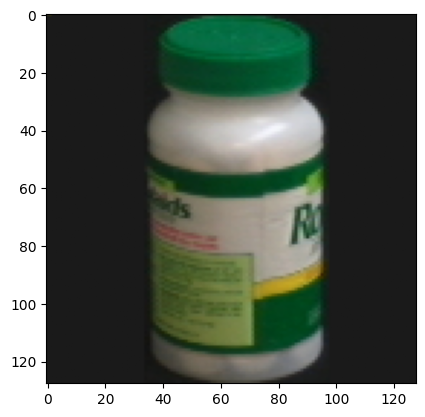

In [59]:
def remove_element_from_lists(list_of_lists, ix):
    for given_list in list_of_lists:
        del given_list[ix]


list_of_lists = [dir_list, images, hists_3D, hists_1D_C_ordering]
chosen_ix = 19

chosen_img = images[chosen_ix]
chosen_3D_histogram = hists_3D[chosen_ix]
chosen_1D_histogram = hists_1D_C_ordering[chosen_ix]

plt.imshow(images[chosen_ix])
plt.show()


In [60]:
print(dir_list[chosen_ix-1 : chosen_ix+2])
remove_element_from_lists(list_of_lists, chosen_ix)
print(dir_list[chosen_ix-1 : chosen_ix+2])

['object_05_3.png', 'object_05_4.png', 'object_06_1.png']
['object_05_3.png', 'object_06_1.png', 'object_06_2.png']


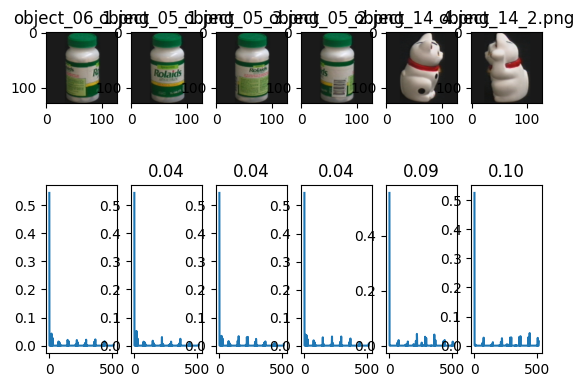

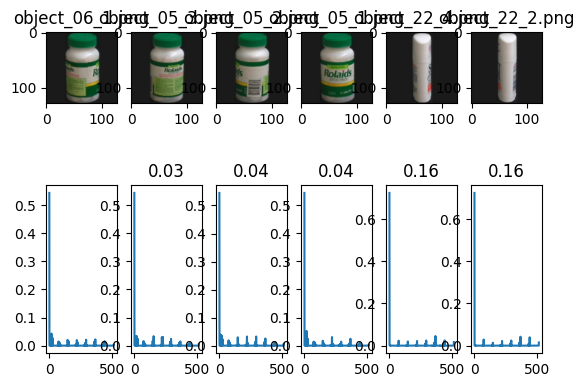

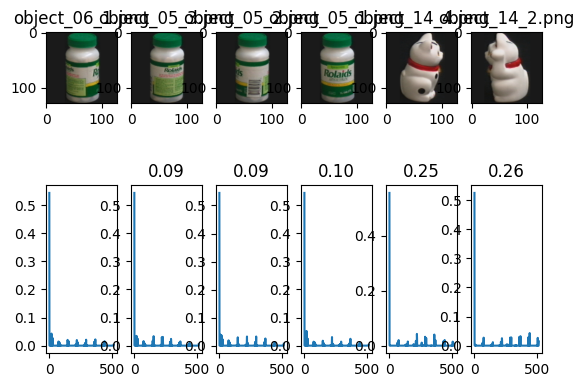

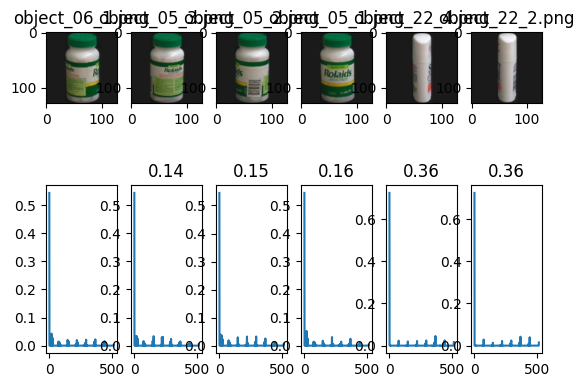

In [61]:

L2_distances_with_ixs = []
chi_square_distances_with_ixs = []
intersection_distances_with_ixs = []
hellinger_distances_with_ixs = []

for ix in range(len(hists_1D_C_ordering)):
    hist = hists_1D_C_ordering[ix]
    L2_distances_with_ixs.append((L2_distance(hist, chosen_1D_histogram), ix))
    chi_square_distances_with_ixs.append((chi_square_distance(hist, chosen_1D_histogram), ix))
    intersection_distances_with_ixs.append((intersection_distance(hist, chosen_1D_histogram), ix))
    hellinger_distances_with_ixs.append((hellinger_distance(hist, chosen_1D_histogram), ix))

distances_lists = [L2_distances_with_ixs, chi_square_distances_with_ixs, intersection_distances_with_ixs, hellinger_distances_with_ixs]
sorted_distances_lists = []
for given_list in distances_lists:
    sorted_distances_lists.append(sorted(given_list)) #key=lambda pair: pair[0]

# distance_short_names = ["L2", "chi", "inter", "hell"]
for sorted_dist_list in sorted_distances_lists:
    plt.subplot(2, 6, 1)
    plt.title(dir_list[chosen_ix])
    plt.imshow(chosen_img)
    plt.subplot(2, 6, 7)
    plt.plot(chosen_1D_histogram)

    for i in range(5):
        distance, ix = sorted_dist_list[i]
        plt.subplot(2, 6, 2+i)
        plt.title(dir_list[ix])
        plt.imshow(images[ix])
        plt.subplot(2, 6, 8+i)
        plt.title("{:.2f}".format(distance))
        plt.plot(hists_1D_C_ordering[ix])
    
    plt.show()





# Excercise 3, task e
This improves the result substantially for all distances. This can also be seen in the bar plots of the histograms, because the black pixels play a majorly reduced value.

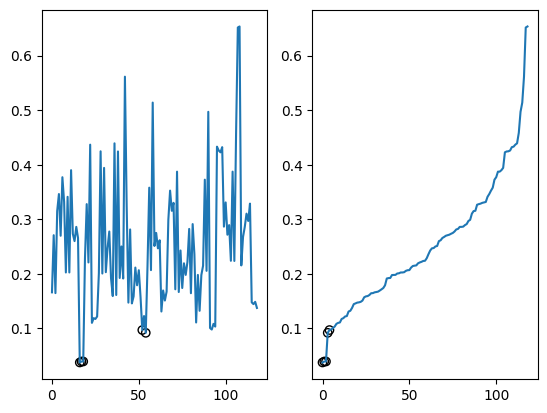

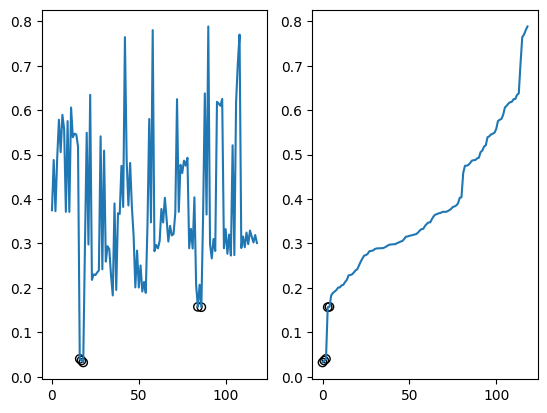

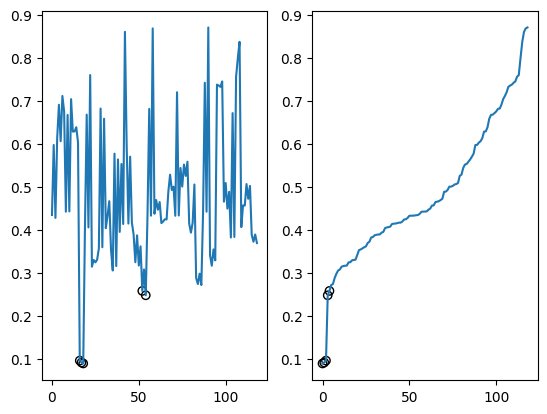

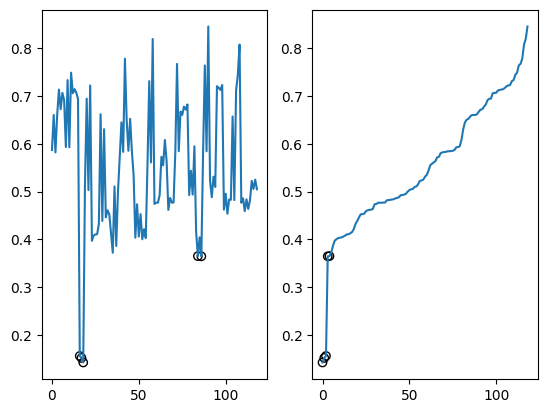

In [62]:

for i in range(len(distances_lists)):
    data = [datapoint[0] for datapoint in distances_lists[i]]
    data_sorted = [datapoint[0] for datapoint in sorted_distances_lists[i]]
    
    best_ixs = [datapoint[1] for datapoint in sorted_distances_lists[i][0:5]]
    best_datums = [datapoint[0] for datapoint in sorted_distances_lists[i][0:5]]
    
    plt.subplot(1, 2, 1)
    plt.plot(data)
    plt.scatter(best_ixs, best_datums, marker="o", facecolors="none", edgecolors="k")
    plt.subplot(1, 2, 2)
    plt.plot(data_sorted)
    plt.scatter(range(5), best_datums, marker="o", facecolors="none", edgecolors="k")
    plt.show()

In [92]:
def average_frequency_histogram(list_of_histograms):
    sum_hist = np.zeros(list_of_histograms[0].shape)
    for hist in list_of_histograms:
        sum_hist += hist
    
    average_hist = sum_hist / len(list_of_histograms)
    return average_hist

def exponential_weights_from_avg_freq_hist(avg_freq_hist, lam):
    scaled = -lam * avg_freq_hist
    # print(scaled)
    weights = np.exp(scaled)
    print(weights)
    return weights

average_frequency_hist = average_frequency_histogram(hists_3D)

# lam = 20 kar dobro deluje
lam = 100

# print(average_frequency_hist)
exp_weights = exponential_weights_from_avg_freq_hist(average_frequency_hist, lam)






[[[1.59403178e-19 7.99533228e-01 9.99794861e-01 1.00000000e+00
   1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
  [1.59965270e-01 7.05553751e-01 9.72433996e-01 9.26947842e-01
   9.99948711e-01 1.00000000e+00 1.00000000e+00 1.00000000e+00]
  [4.28939391e-01 6.02267604e-01 9.71387160e-01 9.66764702e-01
   9.31045588e-01 9.97694609e-01 1.00000000e+00 1.00000000e+00]
  [8.84042639e-01 6.63982333e-01 8.95221664e-01 1.00000000e+00
   9.94884126e-01 9.85387570e-01 1.00000000e+00 1.00000000e+00]
  [8.60996915e-01 9.03524806e-01 8.31016374e-01 9.99538496e-01
   1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
  [9.37803220e-01 9.32431467e-01 9.25237866e-01 9.89591379e-01
   1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
  [9.66715118e-01 8.89591778e-01 9.92488715e-01 9.93048826e-01
   1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
  [9.99794861e-01 9.90759460e-01 9.99384709e-01 9.99897425e-01
   1.00000000e+00 1.00000000e+00 1.00000000e+00 

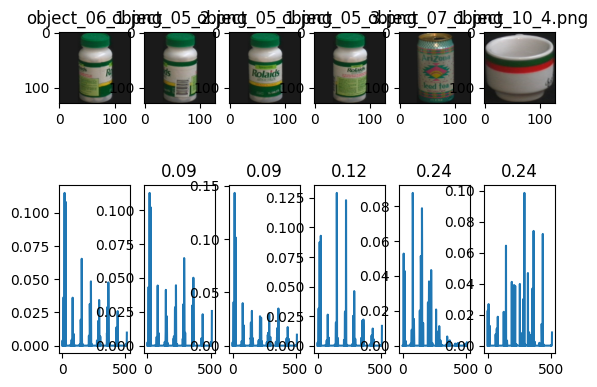

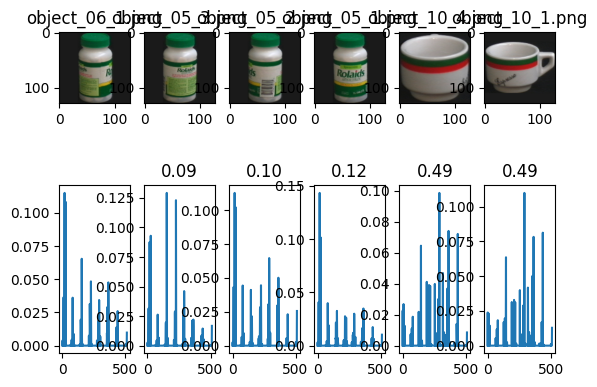

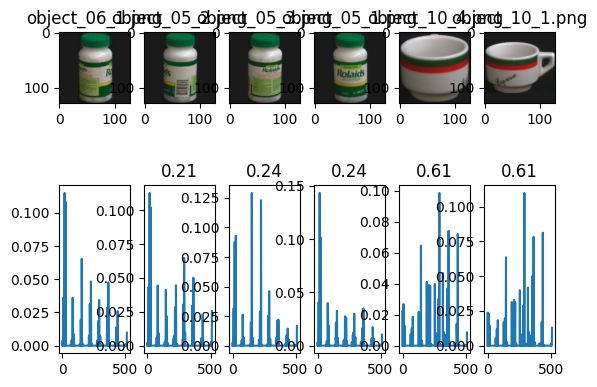

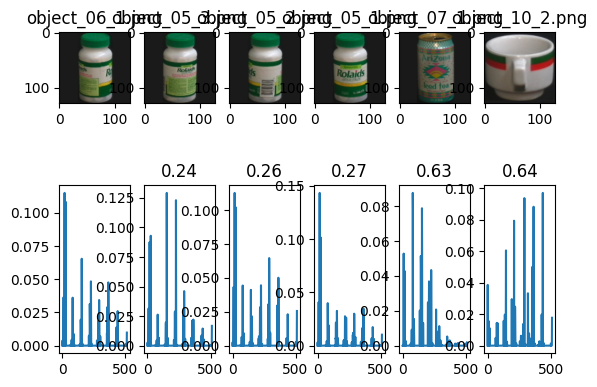

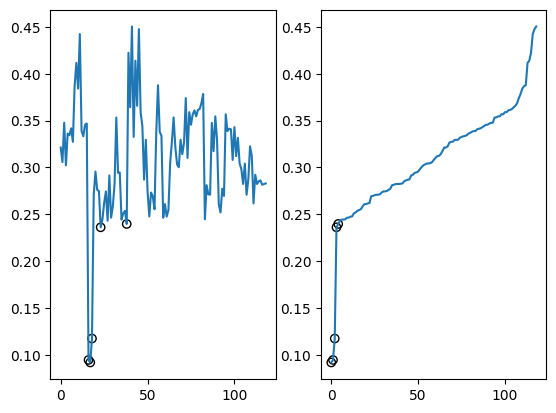

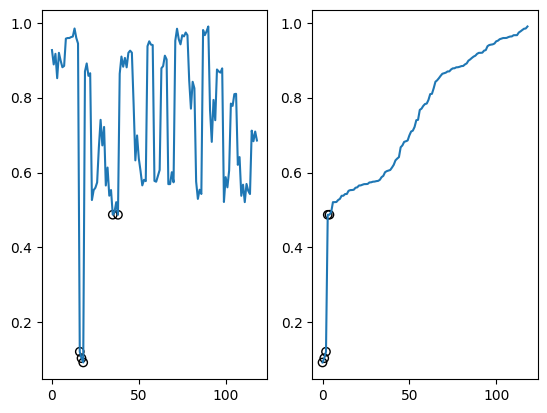

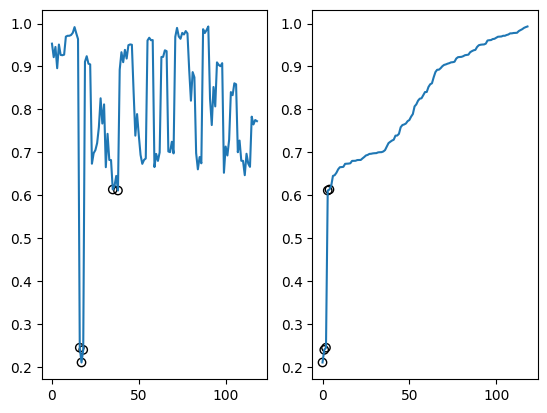

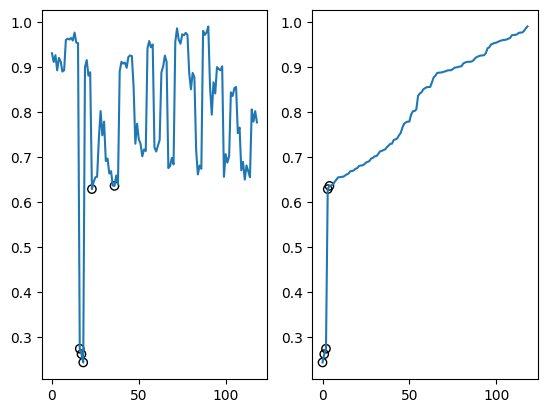

In [93]:

def new_way(hists_3D, chosen_3D_histogram, exp_weights):
    hists_3D = [ i * exp_weights for i in hists_3D]
    hists_3D = [ i / np.sum(i) for i in hists_3D]
    
    chosen_3D_histogram = chosen_3D_histogram * exp_weights
    chosen_3D_histogram = chosen_3D_histogram / np.sum(chosen_3D_histogram)
    chosen_1D_histogram = chosen_3D_histogram.reshape(-1)

    hists_1D_C_ordering = []
    for hist in hists_3D:
        hists_1D_C_ordering.append(hist.reshape(-1))


    L2_distances_with_ixs = []
    chi_square_distances_with_ixs = []
    intersection_distances_with_ixs = []
    hellinger_distances_with_ixs = []

    for ix in range(len(hists_1D_C_ordering)):
        hist = hists_1D_C_ordering[ix]
        L2_distances_with_ixs.append((L2_distance(hist, chosen_1D_histogram), ix))
        chi_square_distances_with_ixs.append((chi_square_distance(hist, chosen_1D_histogram), ix))
        intersection_distances_with_ixs.append((intersection_distance(hist, chosen_1D_histogram), ix))
        hellinger_distances_with_ixs.append((hellinger_distance(hist, chosen_1D_histogram), ix))

    distances_lists = [L2_distances_with_ixs, chi_square_distances_with_ixs, intersection_distances_with_ixs, hellinger_distances_with_ixs]
    sorted_distances_lists = []
    for given_list in distances_lists:
        sorted_distances_lists.append(sorted(given_list)) #key=lambda pair: pair[0]

    # distance_short_names = ["L2", "chi", "inter", "hell"]
    for sorted_dist_list in sorted_distances_lists:
        plt.subplot(2, 6, 1)
        plt.title(dir_list[chosen_ix])
        plt.imshow(chosen_img)
        plt.subplot(2, 6, 7)
        plt.plot(chosen_1D_histogram)

        for i in range(5):
            distance, ix = sorted_dist_list[i]
            plt.subplot(2, 6, 2+i)
            plt.title(dir_list[ix])
            plt.imshow(images[ix])
            plt.subplot(2, 6, 8+i)
            plt.title("{:.2f}".format(distance))
            plt.plot(hists_1D_C_ordering[ix])
        
        plt.show()


    for i in range(len(distances_lists)):
        data = [datapoint[0] for datapoint in distances_lists[i]]
        data_sorted = [datapoint[0] for datapoint in sorted_distances_lists[i]]
        
        best_ixs = [datapoint[1] for datapoint in sorted_distances_lists[i][0:5]]
        best_datums = [datapoint[0] for datapoint in sorted_distances_lists[i][0:5]]
        
        plt.subplot(1, 2, 1)
        plt.plot(data)
        plt.scatter(best_ixs, best_datums, marker="o", facecolors="none", edgecolors="k")
        plt.subplot(1, 2, 2)
        plt.plot(data_sorted)
        plt.scatter(range(5), best_datums, marker="o", facecolors="none", edgecolors="k")
        plt.show()



new_way(hists_3D, chosen_3D_histogram, exp_weights)